# Análise da Cultura Desporto e Lazer

In [3]:
import pandas as pd
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt


### Funções:

In [1]:
def processar_ficheiro(caminho_ficheiro, header=4, pasta_saida='.'):
    nome_base = os.path.splitext(os.path.basename(caminho_ficheiro))[0]
    
    df = pd.read_excel(caminho_ficheiro, header=header)
    
    df.columns = df.columns.map(str).str.strip()

    if len(df.columns) >= 2:
        df.columns.values[0] = 'local'
        df.columns.values[1] = 'codigo'

    df = df.loc[:, ~df.columns.str.startswith('Unnamed')]
    df = df[~df.iloc[:, 1:].isna().all(axis=1)]
    df = df.fillna(0)

    nome_base = os.path.splitext(os.path.basename(caminho_ficheiro))[0]
    caminho_csv = os.path.join(pasta_saida, f'{nome_base}.csv')
    df.to_csv(caminho_csv, index=False)

    return df


In [2]:
def carregar_municipios(df):
    df['codigo'] = df['codigo'].astype(str)
    df_municipios = df[df['codigo'].astype(str).apply(lambda x: len(x) >= 7)].copy()
    return df_municipios

In [4]:
def aplicar_kmeans(df, n_clusters=3, nome_cluster='cluster'):
    dados_numericos = df.drop(columns=['local', 'codigo'])
    scaler = StandardScaler()
    dados_escalados = scaler.fit_transform(dados_numericos)

    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(dados_escalados)

    # Ordena os clusters
    centroides = kmeans.cluster_centers_
    ordem = np.argsort(centroides[:, 0])
    novo_mapeamento = {old: new for new, old in enumerate(ordem)}
    labels_ordenados = np.vectorize(novo_mapeamento.get)(labels)

    df[nome_cluster] = labels_ordenados

    coluna = dados_numericos.columns[0]
    df_plot = df.copy()
    df_plot['valor'] = dados_escalados[:, 0]
    df_plot['y'] = 0 

    fig = px.scatter(
        df_plot, 
        x='valor', 
        y='y', 
        color=nome_cluster,
        hover_data=['local', 'codigo', coluna],
        color_continuous_scale='viridis',
    )
    fig.update_traces(marker=dict(size=10))
    fig.update_layout(
        xaxis_title=coluna,
        yaxis=dict(showticklabels=False, showgrid=False),
        height=300
    )
    fig.show()

    print(df[nome_cluster].value_counts().sort_index())
    return df



In [5]:
def elbow_rule(df, max_k=10):
    X = df.drop(columns=['local', 'codigo'])
    inertias = []
    ks = range(1, max_k + 1)

    for k in ks:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(ks, inertias, marker='o')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Inércia')
    plt.title('Regra do Cotovelo (Elbow Method)')
    plt.grid(True)
    plt.xticks(ks)
    plt.show()
def elbow_rule(df, max_k=10):
    X = df.drop(columns=['local', 'codigo'])
    inertias = []
    ks = range(1, max_k + 1)

    for k in ks:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(ks, inertias, marker='o')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Inércia')
    plt.title('Regra do Cotovelo (Elbow Method)')
    plt.grid(True)
    plt.xticks(ks)
    plt.show()

### Análise da Bens Imóveis e Culturais

In [6]:
df_bens_imoveis_cult = processar_ficheiro('/Users/joaopino/Principal/2Semester/ADE/project/data/dados_municipio/Cultura_Desporto_e_Lazer_(7)/Bens imóveis culturais.xls',0)
df_bens_imoveis_cult = carregar_municipios(df_bens_imoveis_cult)
aplicar_kmeans(df_bens_imoveis_cult,5,nome_cluster='cluster_densidade')


cluster_densidade
0    161
1    118
2     22
3      6
4      1
Name: count, dtype: int64


,local,codigo,Bens imóveis culturais,cluster_densidade
4,Arcos de Valdevez,1111601,29.0,1
5,Caminha,1111602,20.0,1
6,Melgaço,1111603,23.0,1
7,Monção,1111604,13.0,1
8,Paredes de Coura,1111605,9.0,0
...,...,...,...,...
339,Porto Santo,3003201,4.0,0
340,Ribeira Brava,3003107,5.0,0
341,Santa Cruz,3003108,15.0,1
342,Santana,3003109,7.0,0


### Análise das Despersas das Câmaras Municipais em cultura e desporto no total de despesas

In [8]:
df_despesas = processar_ficheiro('/Users/joaopino/Principal/2Semester/ADE/project/data/dados_municipio/Cultura_Desporto_e_Lazer_(7)/Despesas das câmaras municipais em cultura e desporto no total de despesas.xls',0)
df_despesas = carregar_municipios(df_despesas)
aplicar_kmeans(df_despesas,4,nome_cluster='cluster_despesas_cm_cult_desporto')

cluster_despesas_cm_cult_desporto
0     72
1    112
2    101
3     23
Name: count, dtype: int64


,local,codigo,Despesas das câmaras municipais em cultura e desporto no total de despesas,cluster_despesas_cm_cult_desporto
4,Arcos de Valdevez,1111601,15.3,2
5,Caminha,1111602,8.0,1
6,Melgaço,1111603,5.7,0
7,Monção,1111604,13.2,2
8,Paredes de Coura,1111605,13.1,2
...,...,...,...,...
339,Porto Santo,3003201,12.6,2
340,Ribeira Brava,3003107,7.2,1
341,Santa Cruz,3003108,3.7,0
342,Santana,3003109,6.3,0


### Análise das Despesas em atividades e equipamentos desportivos dos municípios por habitante

In [ ]:
df_indice_renovacao = processar_ficheiro('/Users/joaopino/Principal/2Semester/ADE/project/data/dados_municipio/Cultura_Desporto_e_Lazer_(7)/Despesas em atividades e equipamentos desportivos dos municípios por habitante.xls',0)
df_indice_renovacao = carregar_municipios(df_indice_renovacao)
print(df_indice_renovacao.shape)

aplicar_kmeans(df_indice_renovacao,nome_cluster='cluster_indice_renovacao')

(308, 3)


cluster_indice_renovacao
0    224
1     79
2      5
Name: count, dtype: int64


,local,codigo,Despesas em atividades e equipamentos desportivos dos municípios por habitante,cluster_indice_renovacao
4,Arcos de Valdevez,1111601,117.9,1
5,Caminha,1111602,16.5,0
6,Melgaço,1111603,19.7,0
7,Monção,1111604,39.6,0
8,Paredes de Coura,1111605,43.9,0
...,...,...,...,...
342,Ribeira Brava,3003107,18.9,0
343,Santa Cruz,3003108,2.6,0
344,Santana,3003109,22.9,0
345,São Vicente,3003110,57.5,0


### Análise de Despesas em bibliotecas e arquivos

In [13]:
df_indice_renovacao = processar_ficheiro('/Users/joaopino/Principal/2Semester/ADE/project/data/dados_municipio/Cultura_Desporto_e_Lazer_(7)/Despesas em bibliotecas e arquivos.xls',0)
df_indice_renovacao = carregar_municipios(df_indice_renovacao)
print(df_indice_renovacao.shape)

aplicar_kmeans(df_indice_renovacao,nome_cluster='cluster_indice_renovacao')


(257, 3)


cluster_indice_renovacao
0    248
1      7
2      2
Name: count, dtype: int64


,local,codigo,Despesas em bibliotecas e arquivos,cluster_indice_renovacao
0,2023,Portugal,88722301.0,2
1,0,Continente,86473670.0,2
3,0,Alto Minho,3377844.0,0
4,0,Arcos de Valdevez,225317.0,0
5,0,Caminha,359086.0,0
...,...,...,...,...
339,0,Porto Santo,39758.0,0
340,0,Ribeira Brava,86757.0,0
341,0,Santa Cruz,53693.0,0
342,0,Santana,0.0,0


# VER CÓDIGO ESTÁ MAL

In [ ]:
df_pedido_residencia = processar_ficheiro('./População estrangeira que solicitou estatuto de residente.xls', 2).iloc[:, :8]
#df_indice_renovacao = carregar_municipios(df_pedido_residencia)
#print(df_pedido_residencia)

### Análise Saldo Migratório

In [ ]:
df_saldo_migratorio = processar_ficheiro('./Saldo migratório.xls', 0)
df_saldo_migratorio = carregar_municipios(df_saldo_migratorio)
print(df_saldo_migratorio.shape)
aplicar_kmeans(df_saldo_migratorio,nome_cluster='cluster_saldo_migratorio')

(308, 3)


cluster_saldo_migratorio
0    276
1     30
2      2
Name: count, dtype: int64


,local,codigo,Saldo migratório,cluster_saldo_migratorio
4,Arcos de Valdevez,1111601,403.0,0
5,Caminha,1111602,332.0,0
6,Melgaço,1111603,134.0,0
7,Monção,1111604,310.0,0
8,Paredes de Coura,1111605,115.0,0
...,...,...,...,...
342,Ribeira Brava,3003107,292.0,0
343,Santa Cruz,3003108,685.0,0
344,Santana,3003109,82.0,0
345,São Vicente,3003110,152.0,0


### Análise Saldo Natural

(308, 3)


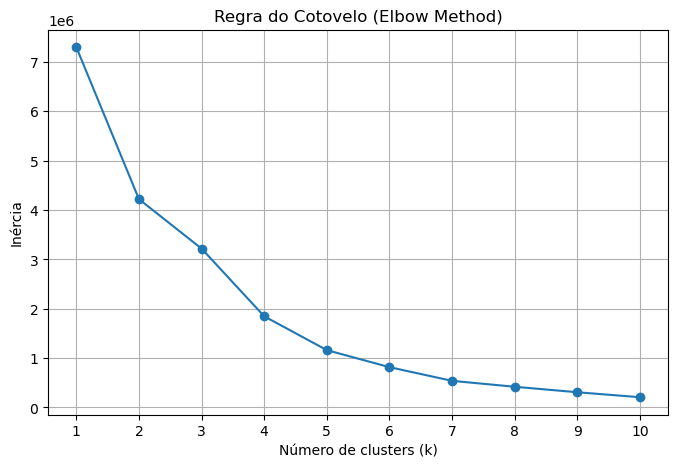

cluster_saldo_natural
0      9
1     84
2    215
Name: count, dtype: int64


,local,codigo,Saldo natural,cluster_saldo_natural
4,Arcos de Valdevez,1111601,-296.0,1
5,Caminha,1111602,-113.0,2
6,Melgaço,1111603,-142.0,1
7,Monção,1111604,-227.0,1
8,Paredes de Coura,1111605,-79.0,2
...,...,...,...,...
342,Ribeira Brava,3003107,-66.0,2
343,Santa Cruz,3003108,-8.0,2
344,Santana,3003109,-53.0,2
345,São Vicente,3003110,-24.0,2


In [ ]:
df_saldo_natural= processar_ficheiro('./Saldo natural.xls', 0)
df_saldo_natural = carregar_municipios(df_saldo_natural)
print(df_saldo_natural.shape)

elbow_rule(df_saldo_natural, max_k=10)
aplicar_kmeans(df_saldo_natural,3,nome_cluster='cluster_saldo_natural')

### Análise Taxa de Crescimento

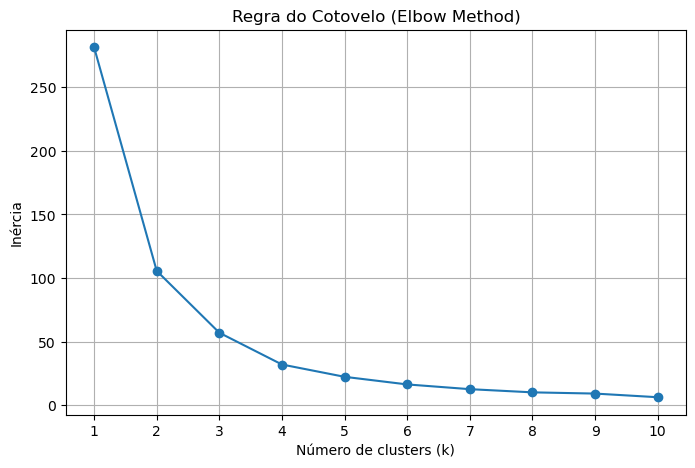

                 local   codigo  Taxa de crescimento efetivo
4    Arcos de Valdevez  1111601                         0.70
5              Caminha  1111602                         1.45
6              Melgaço  1111603                        -0.21
7               Monção  1111604                         0.65
8     Paredes de Coura  1111605                         0.38
..                 ...      ...                          ...
339        Porto Santo  3003201                         3.70
340      Ribeira Brava  3003107                         1.67
341         Santa Cruz  3003108                         1.47
342            Santana  3003109                         0.48
343        São Vicente  3003110                         2.13

[308 rows x 3 columns]


cluster_taxa_crescimento
0    56
1    97
2    77
3    58
4    20
Name: count, dtype: int64


,local,codigo,Taxa de crescimento efetivo,cluster_taxa_crescimento
4,Arcos de Valdevez,1111601,0.70,1
5,Caminha,1111602,1.45,3
6,Melgaço,1111603,-0.21,0
7,Monção,1111604,0.65,1
8,Paredes de Coura,1111605,0.38,1
...,...,...,...,...
339,Porto Santo,3003201,3.70,4
340,Ribeira Brava,3003107,1.67,3
341,Santa Cruz,3003108,1.47,3
342,Santana,3003109,0.48,1


In [ ]:
df_taxa_crescimento = processar_ficheiro('./Taxa de crescimento efetivo.xls', 0)
df_taxa_crescimento = carregar_municipios(df_taxa_crescimento)
elbow_rule(df_taxa_crescimento, max_k=10)

print(df_taxa_crescimento)
aplicar_kmeans(df_taxa_crescimento,5,nome_cluster='cluster_taxa_crescimento')



### Análise Global

In [ ]:
from functools import reduce
dataframes = [
    df_taxa_crescimento[['local', 'cluster_taxa_crescimento']],
    df_densidade_pop[['local', 'cluster_densidade']],
    df_idade[['local', 'cluster_idade']],
    df_saldo_natural[['local', 'cluster_saldo_natural']],
    df_saldo_migratorio[['local', 'cluster_saldo_migratorio']],
    df_indice_renovacao[['local', 'cluster_indice_renovacao']],
]

df_cluster_populacao = reduce(
    lambda left, right: pd.merge(left, right, on='local', how='inner'),
    dataframes
)


In [ ]:
def kmeans_com_cotovelo(df, colunas_numericas, nome_cluster='cluster_final', max_k=10, k_escolhido=3):
    print(df.shape)
    df = df.copy()
    X = df[colunas_numericas].values
    X_scaled = StandardScaler().fit_transform(X)

    # Gráfico do cotovelo
    inercia = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans.fit(X_scaled)
        inercia.append(kmeans.inertia_)

    plt.figure(figsize=(8, 4))
    plt.plot(range(1, max_k + 1), inercia, marker='o')
    plt.title('Método do Cotovelo')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Inércia (Soma das Distâncias ao Centro)')
    plt.grid(True)
    plt.show()

    return df


(312, 7)


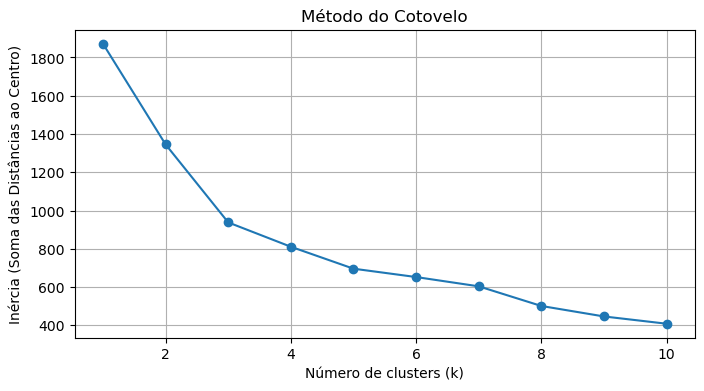

In [ ]:
colunas_cluster = [
    'cluster_taxa_crescimento',
    'cluster_densidade',
    'cluster_idade',
    'cluster_saldo_natural',
    'cluster_saldo_migratorio',
    'cluster_indice_renovacao'
]

df_resultado = kmeans_com_cotovelo(df_cluster_populacao, colunas_numericas=colunas_cluster, k_escolhido=3)


In [ ]:
X = df_cluster_populacao[colunas_cluster].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=6, random_state=42, n_init='auto')
df_cluster_populacao['cluster_final'] = kmeans.fit_predict(X_scaled)


print(df_cluster_populacao['cluster_final'].value_counts().sort_index())


cluster_final
0    81
1    23
2    62
3    22
4    72
5    52
Name: count, dtype: int64
